<a href="https://colab.research.google.com/github/GustavoFRS/RollerCoasterAnalysis/blob/main/RollerCoasterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# load rankings data
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

### Rankings Over time

In [5]:
def ranking_overtime(name, rankings_df, park_name):
  df = rankings_df[(rankings_df['Name'] == name) & (rankings_df['Park'] == park_name)]
  plt.plot(df['Year of Rank'], df['Rank'])
  plt.gca().invert_yaxis()
  plt.show()
  plt.close()

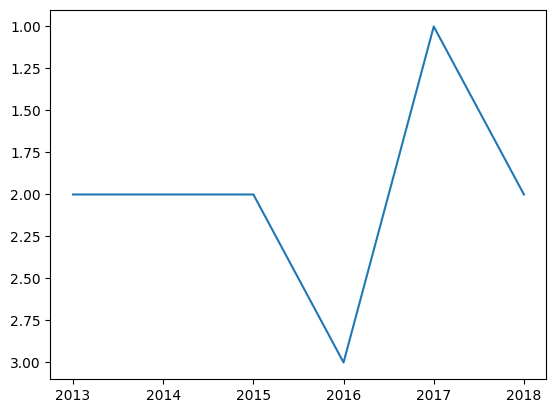

In [6]:
ranking_overtime('El Toro', wood, 'Six Flags Great Adventure')

In [37]:
def ranking_against(roller1, park1, roller2, park2, dataframe):
  roller1_df = dataframe[(dataframe['Name'] == roller1) & (dataframe['Park'] == park1)]
  roller2_df = dataframe[(dataframe['Name'] == roller2) & (dataframe['Park'] == park2)]
  plt.plot(roller1_df['Year of Rank'], roller1_df['Rank'], color='teal', label=roller1)
  plt.plot(roller1_df['Year of Rank'], roller2_df['Rank'], color='purple', label=roller2)
  plt.legend(loc='lower left')
  plt.yticks([1, 2, 3, 4])
  plt.gca().invert_yaxis()
  plt.title(f'{roller1}, vs {roller2} Rankings Over Time')
  plt.show()
  plt.close()

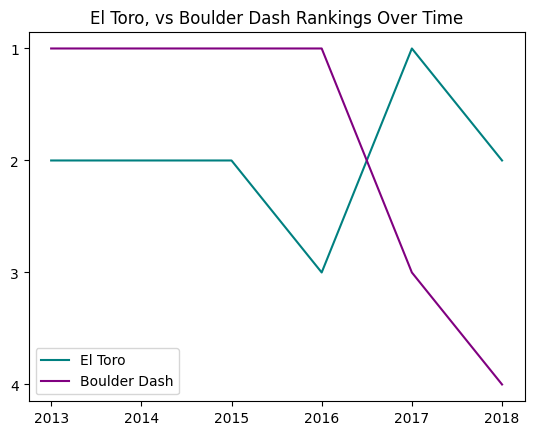

In [38]:
ranking_against('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce', wood)

In [26]:
wood['Rank'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

In [34]:
def top_n(n, dataframe):
  df = dataframe.head(n)
  for coaster_name in df['Name']:
    coaster_ranking = dataframe.loc[dataframe['Name'] == coaster_name]
    plt.plot(coaster_ranking['Year of Rank'], coaster_ranking['Rank'], label=coaster_name)
  
  # Set labels and title
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.gca().invert_yaxis()
  
  plt.title(f'Top {n} Roller Coasters Ranking Over Time')
  plt.legend()
  plt.show()
  plt.close()

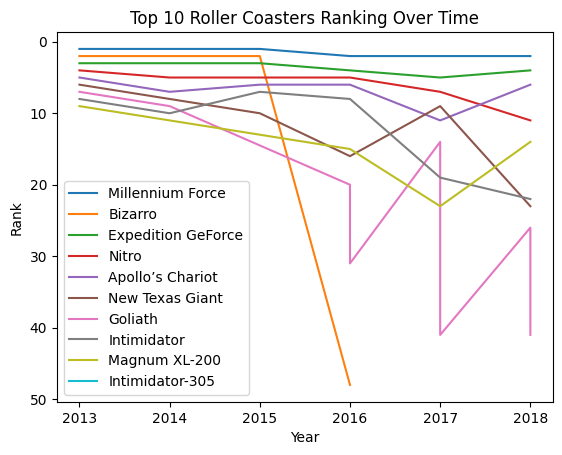

In [36]:
top_n(10, steel)

In [39]:
roller_coasters = pd.read_csv('roller_coasters.csv')
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


### Histograms

In [56]:
def histogram(dataframe, column):
  plt.hist(dataframe[column].dropna())
  plt.xlabel(column.title())
  plt.ylabel('Count')
  plt.title(f'{column.title()} Histogram')
  plt.show()
  plt.close()

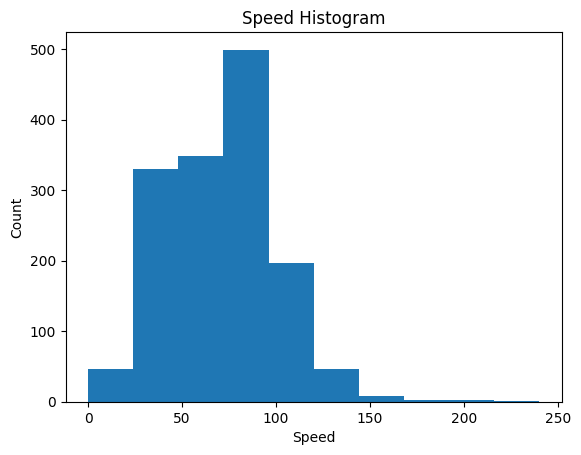

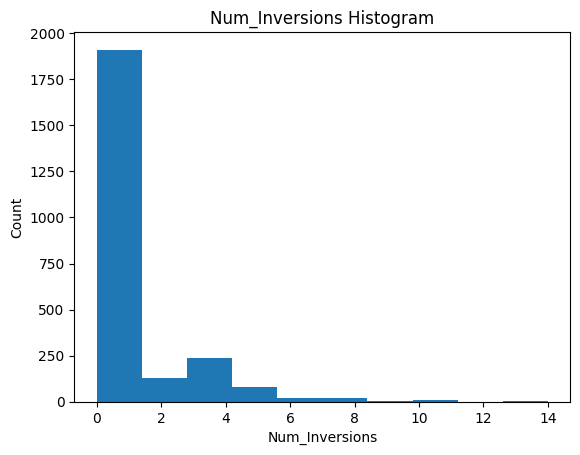

In [57]:
histogram(roller_coasters, 'speed')
histogram(roller_coasters, 'num_inversions')

In [98]:
def inversions_at_park(dataframe, park):
  df = dataframe[dataframe['park'] == park]
  sorted_df= df.sort_values(by='num_inversions', ascending=False)
  plt.bar(sorted_df['name'], sorted_df['num_inversions'])
  plt.xticks(sorted_df['name'], rotation=90)
  plt.yticks(np.arange(0, sorted_df['num_inversions'].max() + 1, 1))
  plt.xlabel('Coaster')
  plt.ylabel('Inversions')
  plt.title(f'Inversions Per Coaster at {park}')
  plt.show()
  plt.close()

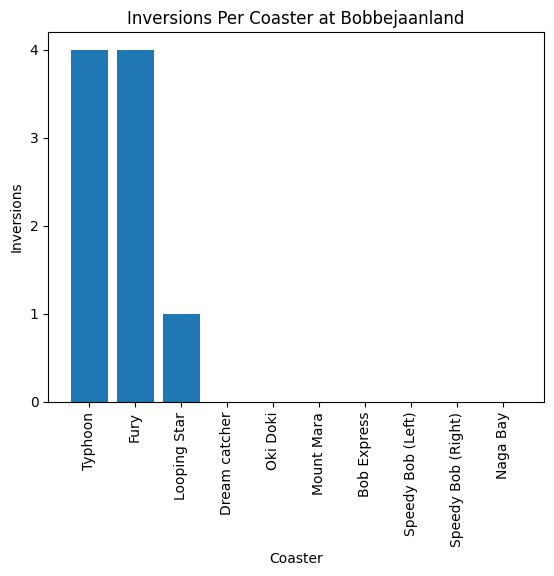

In [99]:
inversions_at_park(roller_coasters, 'Bobbejaanland')

### Operating Coasters Analysis

In [117]:
def operation_at_park(park):
  operating = len(roller_coasters[(roller_coasters['status'] == 'status.operating') & (roller_coasters['park'] == park)])
  closed = len(roller_coasters[(roller_coasters['status'] == 'status.closed.definitely') & (roller_coasters['park'] == park)])
  plt.pie([operating, closed], autopct='%0.1f%%', labels=['Operating', 'Closed'])
  plt.title(f'Closed vs Operating Coasters at {park}')
  plt.show()
  plt.close()

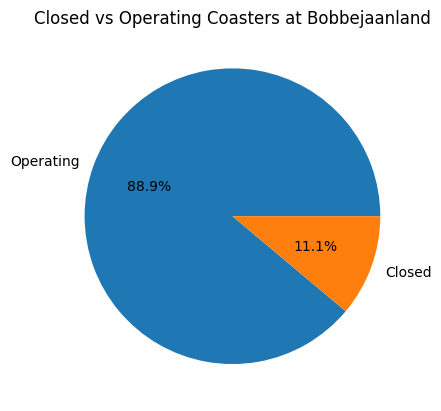

In [118]:
operation_at_park('Bobbejaanland')

### Speed v Height Correlation

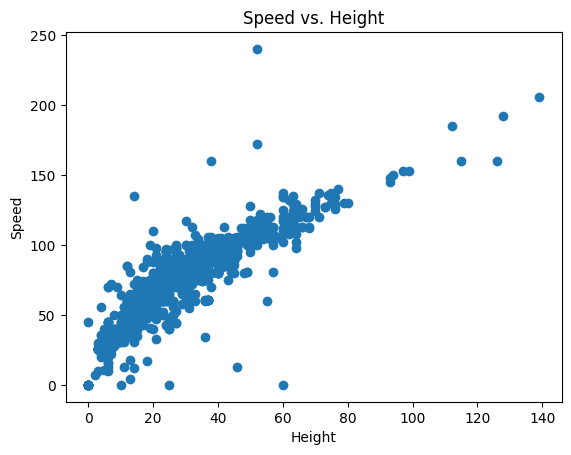

In [130]:
scatter_df = roller_coasters[roller_coasters['height'] < 200] # Eliminate outlier with 1000M height
plt.scatter(scatter_df['height'],scatter_df['speed'])
plt.title('Speed vs. Height')
plt.xlabel('Height')
plt.ylabel('Speed')
plt.show()
plt.close()

In [129]:
valid_indices = np.logical_and(~np.isnan(scatter_df['height']), ~np.isnan(scatter_df['speed']))

valid_height = scatter_df['height'][valid_indices]
valid_speed = scatter_df['speed'][valid_indices]

correlation_matrix = np.corrcoef(valid_height, valid_speed)
correlation_coefficient = correlation_matrix[0, 1]

print("R-value:", correlation_coefficient)

R-value: 0.8813760475799065
